# 8) Natural Language processing
Natural Language Processing is the technology used to aid computers to understand the human’s natural language like English. The objective of NLP is to read, understand, and make sense of the human languages. NLP techniques rely on machine learning to derive meaning from human languages.

#### NLTK is a python package to handle text data.

## a) Use NLTK package and perform the following
* Tokenization
* Stemming
* Lemmatization
* Bag of words
* TF/IDF

## b) Given set of documents, use NLTK to classify them.

Sentence tokenization
Word tokenization
Frequency distribution of words in a document
Stop words
Stemming
Normalization
POS Tagger


At the end Sentiment analysis is performed on movie reviews dataset using Naivebayes theorm.

TF-IDF is used for word vectorization

In [26]:
#import nltk package
import nltk

## 1)Tokenization
Tokenization is the first step in text analytics. The process of breaking down a text paragraph into smaller chunks such as words or sentence is called Tokenization. Token is a single entity that is building blocks for sentence or paragraph.

## 1 a) Sentence Tokenization
Sentence tokenizer breaks text paragraph into sentences.

Note: You should download **nltk.download('punkt')** before using "sentence tokenizer.

This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences. 

In [27]:
from nltk.tokenize import sent_tokenize
# nltk.download('punkt')
text=" I study in Vishnu Institute of Technology. VITB rocks."
tokenized_text=sent_tokenize(text)
print(tokenized_text)

[' I study in Vishnu Institute of Technology.', 'VITB rocks.']


## 1 b) Word Tokenization
Word tokenizer breaks text paragraph into words.

In [28]:
from nltk.tokenize import word_tokenize

tokenized_word=word_tokenize(text)
print(tokenized_word)

['I', 'study', 'in', 'Vishnu', 'Institute', 'of', 'Technology', '.', 'VITB', 'rocks', '.']


## 2) Stop words

Stopwords considered as noise in the text. Text may contain stop words such as **is, am, are, this, a, an, the** etc.

In NLTK for removing stopwords, you need to create a list of stopwords and filter out your list of tokens from these words.

In [29]:
#let's list out stopwords available in NLTK package. 

from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

{'myself', 'hasn', 'at', 'are', 'ain', "couldn't", 'their', 't', 'our', 'my', 'those', 'mustn', "aren't", 'for', 'it', 'this', 'too', 'was', 'being', 'ma', 'yourselves', 'am', 'while', 'now', 'isn', 'can', 'me', 'or', 'theirs', 'by', 'whom', 'm', 'then', 'over', 'ours', 'having', 'don', 'the', 'most', 'against', 'its', "you've", 'of', 'weren', 'with', 'an', "haven't", 'been', 'his', 'such', 'himself', "weren't", 'some', 'where', 'further', 'o', 'any', "hadn't", 'wouldn', 'd', 'do', 'more', 'which', 'have', 'should', 'he', 'between', "should've", 'about', 'him', 'who', 'is', 'again', 'these', 'after', 'both', 'she', 'them', 'into', 'doing', "mightn't", "shouldn't", 'and', "shan't", 'same', 'why', 'you', 'a', 'has', 'once', 'than', "didn't", 'yourself', 'that', 'because', 've', 'couldn', 'itself', 'didn', 'there', 'aren', 'how', 'they', 'won', 'doesn', "wouldn't", 'needn', 'before', 'did', 'above', 'herself', 'out', 's', "you'd", 'through', 'not', 'mightn', 'in', 'll', "it's", "hasn't", 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\immid\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
#let's list the tokenized sentence and the filtered one

filtered_sent=[]
for w in tokenized_word:
  if w not in stop_words:
    filtered_sent.append(w)
print("Tokenized version:",tokenized_word)
print("\n")
print("Filterd Version (After removing stopwords):",filtered_sent)

Tokenized version: ['I', 'study', 'in', 'Vishnu', 'Institute', 'of', 'Technology', '.', 'VITB', 'rocks', '.']


Filterd Version (After removing stopwords): ['I', 'study', 'Vishnu', 'Institute', 'Technology', '.', 'VITB', 'rocks', '.']


## 2) Normalization
There are 2 types of normalizations

* Stemming
* Lemmatization

## Stemming
Stemming is a process of linguistic normalization, which reduces words to their root word or chops off the derivational affixes. For example, **connection, connected, connecting** word reduce to a common word **"connect"**.

In [31]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
stemmed_words=[]
for w in filtered_sent:
  stemmed_words.append(ps.stem(w))
print("Filtered Sentence:",filtered_sent)
print("\n")
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['I', 'study', 'Vishnu', 'Institute', 'Technology', '.', 'VITB', 'rocks', '.']


Stemmed Sentence: ['I', 'studi', 'vishnu', 'institut', 'technolog', '.', 'vitb', 'rock', '.']


## Lemmatization
Lemmatization reduces words to their base word, which is linguistically correct lemmas. It transforms root word with the use of vocabulary and morphological analysis. Lemmatization is usually more sophisticated than stemming. Stemmer works on an individual word without knowledge of the context. For example, The word "better" has "good" as its lemma. This thing will miss by stemming because it requires a dictionary look-up.

In [32]:
from nltk.stem.wordnet import WordNetLemmatizer
# nltk.download('wordnet')

lem = WordNetLemmatizer()
lemmitized_words=[]
for w in filtered_sent:
  lemmitized_words.append(lem.lemmatize(w))
print("Filtered Sentence:",filtered_sent)
print("\n")
print("lemmitizer Sentence:",lemmitized_words)

Filtered Sentence: ['I', 'study', 'Vishnu', 'Institute', 'Technology', '.', 'VITB', 'rocks', '.']


lemmitizer Sentence: ['I', 'study', 'Vishnu', 'Institute', 'Technology', '.', 'VITB', 'rock', '.']


## 3) Bag of words
For the bag of words implementation, we use **CountVectorizer** from scikit-learn, which counts the frequency of each word present in our pre-processed dataset.

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
data = CountVectorizer(max_features=2000)
X = data.fit_transform(lemmitized_words).toarray()

In [42]:
X

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [43]:
data.vocabulary_

{'study': 2,
 'vishnu': 4,
 'institute': 0,
 'technology': 3,
 'vitb': 5,
 'rock': 1}



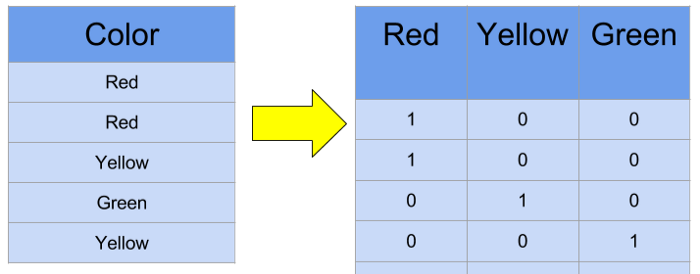

In [14]:
# Import pandas
import pandas as pd

In [16]:
data=pd.read_csv('train.tsv', sep='\t')
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [17]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size=0.3, random_state=123)

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684
